In [1]:
from algorithms.AStarParallelVersion import parallel_a_star, a_star, generate_large_matrix
import matplotlib.pyplot as plt

In [2]:
SIZE = 3000

START = (0, 0)
END = (SIZE - 1, SIZE - 1)

# CORES_NUM = [2, 4, 8, 10]

matrix = generate_large_matrix(SIZE)
matrix[START[0]][START[1]] = 0
matrix[END[0]][END[1]] = 0

# A* default

Successfully achieved solution from (0, 0) to (2999, 2999)
Execution time: 4.9027 seconds
Path length: 6009


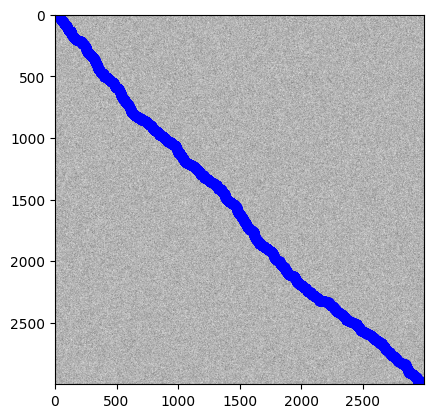

In [3]:
import time

start_time = time.time()
path_length = a_star(matrix, START, END)
end_time = time.time()

execution_time = end_time - start_time
    
print("Execution time:", round(execution_time, 4), "seconds")
print("Path length:", len(path_length))

plt.imshow(matrix, cmap='binary')
plt.plot(START[0], START[1], marker='o', color='red')
plt.plot(END[0], END[1], marker='o', color='green')

if path_length:
   x_coords, y_coords = zip(*path_length)
   plt.plot(y_coords, x_coords, marker='o', color='blue')
plt.show()

# Average A* execution time

In [4]:
import time

total = 0
iter = 20


for i in range(iter):
    start_time = time.time()
    path_length = a_star(matrix, START, END)
    end_time = time.time()
    
    execution_time = end_time - start_time
    total += execution_time
    
print(f"Average time: {round(total / iter, 4)} seconds for {SIZE}x{SIZE}")

Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 2999)
Successfully achieved solution from (0, 0) to (2999, 299

# Average A* execution time depending on the number of cores

In [5]:
import time
from tqdm import tqdm


CORES_NUM = [2, 4, 6, 10]
for thread in CORES_NUM:
    total = 0
    iter = 10
    for i in tqdm(range(iter)):
        start_time = time.time()
        path_length = parallel_a_star(matrix, START, END, thread)
        end_time = time.time()
    
        execution_time = end_time - start_time
        total += execution_time

    print(f"Average time: {round(total / iter, 4)} seconds for {SIZE}x{SIZE} with {thread} threads")

  0%|          | 0/10 [00:00<?, ?it/s]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 10%|█         | 1/10 [00:03<00:32,  3.66s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 20%|██        | 2/10 [00:07<00:28,  3.53s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 30%|███       | 3/10 [00:10<00:24,  3.53s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 40%|████      | 4/10 [00:14<00:21,  3.51s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 50%|█████     | 5/10 [00:17<00:17,  3.51s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 60%|██████    | 6/10 [00:21<00:14,  3.51s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 70%|███████   | 7/10 [00:24<00:10,  3.53s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 80%|████████  | 8/10 [00:28<00:07,  3.56s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


 90%|█████████ | 9/10 [00:31<00:03,  3.55s/it]

Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)


100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


Average time: 3.5292 seconds for 3000x3000 with 2 threads


  0%|          | 0/10 [00:00<?, ?it/s]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 10%|█         | 1/10 [00:02<00:21,  2.35s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 20%|██        | 2/10 [00:04<00:18,  2.37s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 30%|███       | 3/10 [00:06<00:16,  2.32s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 40%|████      | 4/10 [00:09<00:13,  2.30s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 50%|█████     | 5/10 [00:11<00:11,  2.33s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 60%|██████    | 6/10 [00:14<00:09,  2.35s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 70%|███████   | 7/10 [00:16<00:07,  2.35s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 80%|████████  | 8/10 [00:18<00:04,  2.35s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


 90%|█████████ | 9/10 [00:21<00:02,  2.34s/it]

Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)


100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Average time: 2.349 seconds for 3000x3000 with 4 threads


  0%|          | 0/10 [00:00<?, ?it/s]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 10%|█         | 1/10 [00:02<00:22,  2.54s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 20%|██        | 2/10 [00:05<00:20,  2.53s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 30%|███       | 3/10 [00:07<00:17,  2.51s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 40%|████      | 4/10 [00:10<00:15,  2.53s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 50%|█████     | 5/10 [00:12<00:12,  2.50s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 60%|██████    | 6/10 [00:15<00:10,  2.53s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 70%|███████   | 7/10 [00:17<00:07,  2.56s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 80%|████████  | 8/10 [00:20<00:05,  2.56s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


 90%|█████████ | 9/10 [00:22<00:02,  2.55s/it]

Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)


100%|██████████| 10/10 [00:25<00:00,  2.53s/it]


Average time: 2.5271 seconds for 3000x3000 with 6 threads


  0%|          | 0/10 [00:00<?, ?it/s]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 10%|█         | 1/10 [00:03<00:34,  3.83s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 20%|██        | 2/10 [00:07<00:30,  3.77s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 30%|███       | 3/10 [00:10<00:25,  3.62s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 40%|████      | 4/10 [00:14<00:21,  3.60s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 50%|█████     | 5/10 [00:18<00:18,  3.64s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 60%|██████    | 6/10 [00:21<00:14,  3.61s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 70%|███████   | 7/10 [00:25<00:10,  3.58s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 80%|████████  | 8/10 [00:28<00:07,  3.57s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


 90%|█████████ | 9/10 [00:32<00:03,  3.69s/it]

Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)


100%|██████████| 10/10 [00:37<00:00,  3.71s/it]

Average time: 3.7126 seconds for 3000x3000 with 10 threads


In [6]:
# import time
# 
# total = 0
# iter = 20
# 
# CORES = 6
# 
# 
# for i in range(iter):
#     start_time = time.time()
#     path_length = parallel_a_star(matrix, START, END, CORES)
#     end_time = time.time()
# 
#     execution_time = end_time - start_time
#     total += execution_time
# 
# print(f"Average time: {round(total / iter, 4)} seconds for {SIZE}x{SIZE}")

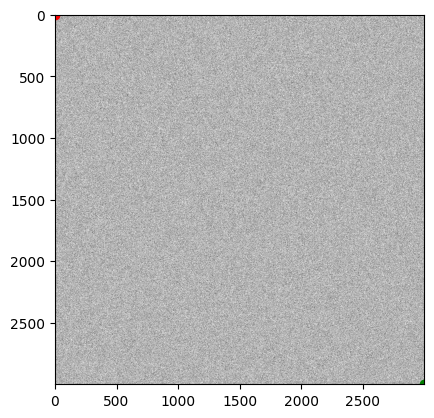

In [7]:
plt.imshow(matrix, cmap='binary')
plt.plot(START[0], START[1], marker='o', color='red')
plt.plot(END[0], END[1], marker='o', color='green')
plt.show()

Executing with 2 number of threads
Successfully achieved parallel solution from (0, 0) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2999, 2999)
Execution time: 4.9328 seconds


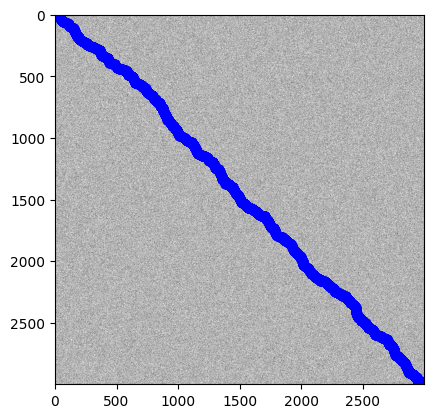

Executing with 4 number of threads
Successfully achieved parallel solution from (0, 0) to (750, 750)
Successfully achieved parallel solution from (750, 750) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2250, 2250)
Successfully achieved parallel solution from (2250, 2250) to (2999, 2999)
Execution time: 3.5074 seconds


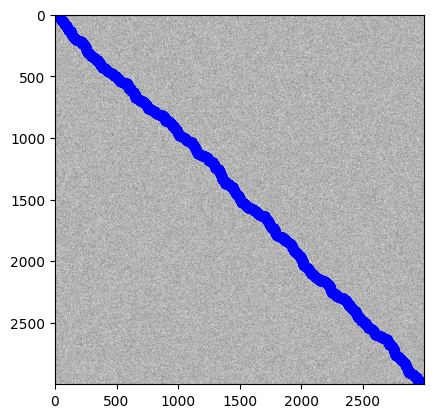

Executing with 6 number of threads
Successfully achieved parallel solution from (0, 0) to (500, 500)
Successfully achieved parallel solution from (500, 500) to (1000, 999)
Successfully achieved parallel solution from (1000, 999) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (2000, 1997)
Successfully achieved parallel solution from (2000, 1997) to (2500, 2499)
Successfully achieved parallel solution from (2500, 2499) to (2999, 2999)
Execution time: 2.6083 seconds


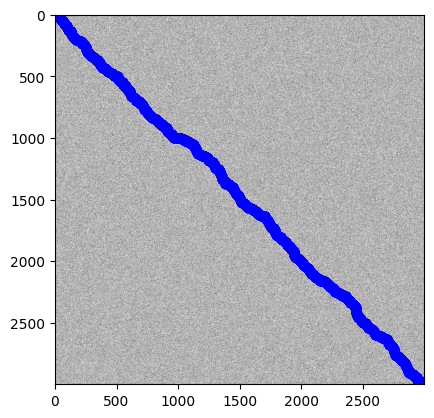

Executing with 10 number of threads
Successfully achieved parallel solution from (0, 0) to (300, 300)
Successfully achieved parallel solution from (300, 300) to (600, 600)
Successfully achieved parallel solution from (600, 600) to (900, 900)
Successfully achieved parallel solution from (900, 900) to (1200, 1200)
Successfully achieved parallel solution from (1200, 1200) to (1500, 1499)
Successfully achieved parallel solution from (1500, 1499) to (1800, 1800)
Successfully achieved parallel solution from (1800, 1800) to (2100, 2100)
Successfully achieved parallel solution from (2100, 2100) to (2400, 2400)
Successfully achieved parallel solution from (2400, 2400) to (2700, 2700)
Successfully achieved parallel solution from (2700, 2700) to (2999, 2999)
Execution time: 3.7633 seconds


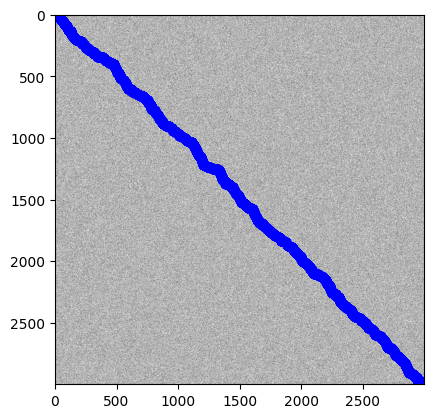

In [8]:
for num in CORES_NUM:
    print(f'Executing with {num} number of threads')
    start_time = time.time()
    path_length = parallel_a_star(matrix, START, END, num)
    end_time = time.time()
    
    execution_time = end_time - start_time
        
    print("Execution time:", round(execution_time, 4), "seconds")
    
    plt.imshow(matrix, cmap='binary')
    plt.plot(START[0], START[1], marker='o', color='red')
    plt.plot(END[0], END[1], marker='o', color='green')
    
    for path in path_length:
        if path:
            x_coords, y_coords = zip(*path)
            plt.plot(y_coords, x_coords, marker='o', color='blue')
    plt.show()